# Relatório técnico-financeiro em cinco ativos da B3

Neste relatório, vamos explorar o comportamento de cinco ativos negociados na B3.

## Seleção de ativos

Nossa intenção é ter uma visão diversificada, então procuraremos quatro ações de setores diferentes. Desse modo, podemos ver como diferntes setores se comportaram. Por isso, escolheremos cinco ações de empresas consolidadas que participem do Ibovespa, o índice de nosso interesse. Analisaremos também um fundo de índice que acompanhe o Ibovespa, de modo que possamos ver quão bem ou mal-sucedidas são as ações em relação ao mercado

In [1]:
assets = [
    'ITUB3.SA', # Setor financeiro
    'MGLU3.SA', # Varejo
    'VALE3.SA', # Commodities
    'RAIL3.SA', # Logística
    'TOTS3.SA', # Tecnologia e consultoria
    'BOVA11.SA',# ETF
    '^BVSP'     # Índice
]    
start_date='2015-04-30' # Começando em Abril de 2015 porque é quando a Rumo (RAIL3)
end_date='2025-04-30'   # começou a ser negociada.

Agora, recuperemos os dados:

In [2]:
import pandas as pd
import yfinance as yf

assets_df = pd.DataFrame()
for asset in assets:
    assets_df[asset] = yf.download(
        asset,
        start='2015-04-30',
        end='2025-04-30',
        auto_adjust=True,
    )['Close']
assets_df.index = assets_df.index.strftime('%Y-%m-%d')
assets_df.reset_index(inplace=True)
assets_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date   ITUB3.SA   MGLU3.SA   VALE3.SA   RAIL3.SA   TOTS3.SA  \
0     2015-04-30   9.893236   1.392496  11.552610  12.346143  10.016928   
1     2015-05-04  10.128623   1.456168  12.639014  12.915965  10.506260   
2     2015-05-05  10.071558   1.508767  13.801927  13.010934  10.736534   
3     2015-05-06   9.928905   1.536451  12.715521  12.156202  10.894850   
4     2015-05-07   9.886107   1.519841  12.179973  11.681351  11.110731   
...          ...        ...        ...        ...        ...        ...   
2482  2025-04-23  29.015858   9.261400  52.613770  18.583305  36.837112   
2483  2025-04-24  29.660219  10.261320  53.434956  19.100842  36.837112   
2484  2025-04-25  29.543064  10.144825  52.024448  18.861242  37.385136   
2485  2025-04-28  29.865246  10.000000  52.208008  18.755817  37.056320   
2486  2025-04-29  30.070271   9.980000  52.014786  18.650394  37.096176   

       BOVA11.SA     ^BVSP  
0      54.619999   56229.0  
1      55.830002   57354.0  
2      56.419998   58052.0  
3      55.430000   57103.0  
4      55.320000   56921.0  
...          ...       ...  
2482  129.080002  132216.0  
2483  131.380005  134580.0  
2484  131.490005  134739.0  
2485  131.649994  135016.0  
2486  131.860001  135093.0  

[2487 rows x 8 columns]

## Análise gráfica de valorização

Vejamos como os valores dessas ações se comportaram:

In [3]:

import plotly.express as px
import plotly.graph_objects as go


import plotly.io as pio
pio.renderers.default = "notebook+pdf"  

assets_only = assets_df.copy()
assets_only.drop(
    labels = ['^BVSP'],  # Como o indice bovespa em uma unidade diferente, vamos
    axis=1,              # utiliar o ETF BOVA11 como seu proxy.
    inplace=True
) 
fig = px.line(title = 'Histórico do preço das ações')
fig.update_traces(line=dict(width=0.1))
for i in assets_only.columns[1:]:
  fig.add_scatter(x = assets_only["Date"] ,y = assets_only[i], name = i)
fig.show()

Surpreeendentemente, o gráfico mostra que algumas das ações (ITUB4 eram mais estáveis do que o esperado. Em especial, ITUB4 e RAIL3 são bem similares, excepto pelas datas recentes em que se começara a haver uma discrepâcia.

Por outro lado, notamos uma queda no início de 2022. Nenhum mistério aqui: essa foi a data do início da pandemia de COVID-29. Ainda assim, nota-se todas as ações recuperaram seau valor, algumas crescendo freneticamente, como Magazine Luzia, o que faz sentido dada sua presença online durante o isolamento social. (Também nota-se que seu valor caiu consideravelmente, talvez indício de uma bolha?)

Já BOVA11 continua crescendo consistentemente.



## Análise gráfica de retornos diários

Agora vamos analisar os retornos diários. Primeiramente, vamos calculá-los:

In [4]:
import numpy as np
import math
from brandedpipes import __

dataset = assets_df.copy() # Not that we get rates, we can use the index, because rates are comparable and dimensionless
dataset.drop(labels = ['Date'], axis=1, inplace=True)
rates = np.log(dataset / dataset.shift(1)) # Daily returns as requestes, not monthly
dataset_date = assets_df.copy()
date = dataset_date.filter(["Date"]) 
dated_rates = pd.concat([date, rates], axis=1) 
return_rates = (__
    | (not math.isnan(r) for r in rates['^BVSP'])  # Getting only valid values
    | dated_rates.loc[__()]                              # and no nan
    |__)
return_rates


Date  ITUB3.SA  MGLU3.SA  VALE3.SA  RAIL3.SA  TOTS3.SA  BOVA11.SA  \
1     2015-05-04  0.023514  0.044711  0.089877  0.045120  0.047695   0.021911   
2     2015-05-05 -0.005650  0.035485  0.088020  0.007326  0.021681   0.010512   
3     2015-05-06 -0.014265  0.018183 -0.081985 -0.067951  0.014638  -0.017703   
4     2015-05-07 -0.004320 -0.010870 -0.043030 -0.039846  0.019621  -0.001986   
5     2015-05-08  0.024235 -0.089499 -0.048476  0.016129  0.010310   0.003249   
...          ...       ...       ...       ...       ...       ...        ...   
2482  2025-04-23  0.019022 -0.060995  0.011821  0.018215  0.000271   0.013650   
2483  2025-04-24  0.021964  0.102526  0.015487  0.027469  0.000000   0.017662   
2484  2025-04-25 -0.003958 -0.011418 -0.026751 -0.012623  0.014767   0.000837   
2485  2025-04-28  0.010846 -0.014379  0.003522 -0.005605 -0.008834   0.001216   
2486  2025-04-29  0.006842 -0.002002 -0.003708 -0.005637  0.001075   0.001594   

         ^BVSP  
1     0.019810  
2     0.012097  
3    -0.016483  
4    -0.003192  
5     0.003998  
...        ...  
2482  0.013340  
2483  0.017722  
2484  0.001181  
2485  0.002054  
2486  0.000570  

[2470 rows x 8 columns]

Como esses valores se comportam? Façamos uma análise:

In [5]:
returns_stats = return_rates.describe()
returns_stats

ITUB3.SA     MGLU3.SA     VALE3.SA     RAIL3.SA     TOTS3.SA  \
count  2470.000000  2470.000000  2470.000000  2470.000000  2470.000000   
mean      0.000406     0.000837     0.000585     0.000094     0.000491   
std       0.017743     0.042964     0.026907     0.029206     0.023914   
min      -0.224042    -0.259173    -0.281822    -0.297632    -0.166569   
25%      -0.008930    -0.021853    -0.013120    -0.012943    -0.012209   
50%       0.000403    -0.000211     0.000000     0.000000     0.000318   
75%       0.009826     0.021823     0.014124     0.013316     0.013758   
max       0.104657     0.316913     0.193574     0.199780     0.180650   

         BOVA11.SA        ^BVSP  
count  2440.000000  2470.000000  
mean      0.000356     0.000329  
std       0.015367     0.015142  
min      -0.157528    -0.159930  
25%      -0.007465    -0.007306  
50%       0.000822     0.000569  
75%       0.008594     0.008352  
max       0.125708     0.130223

In [6]:

fig = px.bar(
    title='Media do retorno de ações',
    data_frame=returns_stats.transpose(),
    y='mean')
fig.show()

In [7]:

fig = px.bar(
    title='Desvio-padrão do retorno de ações',
    data_frame=returns_stats.transpose(),
    y='std')
fig.show()

Podemos ver facilmente que MGLU3 teve o maior retorno, mas também tem alta variabilidade. RAIL3 teve o menor retorno, em média, e ainda teve alta variabilidade. Vejamos a série histórica dos eventos:

In [8]:

figura = px.line(title = 'Histórico de retorno das ações')
for i in return_rates.columns[1:]:
  figura.add_scatter(x = return_rates["Date"] ,y = return_rates[i], name = i)
figura.update_traces(line=dict(width=0.5))
figura.show()

No gráfico, podemos notar uma grande variação dos retornos, mas todos orbitando uma média. Alguns picos e vales são interessantes:
* Em janeiro de 2015, RAIL3 tem uma queda considerável. Não encontrei muitas referências além de [uma subida de mais de 1200% (!) antes](https://www.seudinheiro.com/2019/empresas/rumo-logistica-o-trem-da-alegria-dos-investidores-que-acreditam-que-o-brasil-vai-dar-certo/), de modo que deduzo que essa queda foi um ajuste.
* Em fevereiro de 2019, a VALE3 despenca, devido à [tragédia de Brumadinho](https://g1.globo.com/economia/noticia/2019/01/28/bovespa-cotacao-28012019.ghtml).
* No começo de 2020, temos uma grande variação, relacionada ao início da pandemia. Note-se em especial o pico da MGLU3.
* Em outubro de 2021, ITUB3 aparenta despencar drasticamente, mas é apenas [o efeito da separação da XP, reduzindo o capital do banco de maneira esperada](https://www.seudinheiro.com/2021/economia/acao-do-itau-itub4-caindo-quase-20-calma-e-so-um-ajuste-da-separacao-da-participacao-do-banco-na-xp/). De fato, podemos constatar como a queda ocorreu no mesmo dia em que XPBR31 começou a ser negociada:

In [9]:
import pandas as pd
import yfinance as yf

assets_it_xp = pd.DataFrame()
for asset in ['ITUB3.SA', 'XPBR31.SA']:
    assets_it_xp[asset] = yf.download(
        asset,
            start='2021-09-01',
        end='2021-11-01',
        auto_adjust=True,
    )['Close']
assets_it_xp.index = assets_it_xp.index.strftime('%Y-%m-%d')
assets_it_xp.reset_index(inplace=True)
fig = px.line(title = 'Histórico do preço ITBU3 vs XPBR31', log_y=True)
fig.update_traces(line=dict(width=0.1))
for i in assets_it_xp.columns[1:]:
  fig.add_scatter(x = assets_it_xp["Date"] ,y = assets_it_xp[i], name = i)
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Como uma última observação, assumamos que retorno é normal. Temos esses gráficos das FDPs:

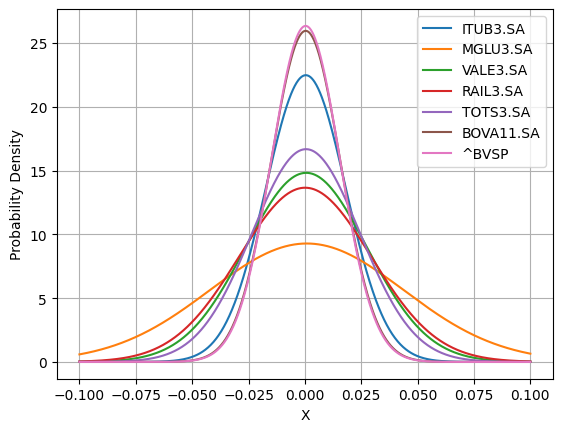

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-0.1, 0.1, 1000)
for a in assets:
    plt.plot(x, norm.pdf(x, loc=returns_stats[a]['mean'], scale=returns_stats[a]['std']),  label=a)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Um ponto interessante é notar que o índice Bovespa, assim como seu fundo de índice, têm baixa variância. Isso faz sentido quando lembramos que o mercado como um todo (aqui, a Bolsa) tende a superar todos os outros investidores. Por outro lado, MGLU3 mostrou-se especialmente imprevisível.

## Simular carteiras via Monte Carlo

Vamos agora explorar os possíveis carteiras que nossas escolhas permitem. Faremos 50000 simulações de carteiras com vários pesos:

In [11]:
import time

__ >> time.time() >> math.floor >> np.random.seed >>__

PORTFOLIOS_COUNT = 50000

assets_portfolio = assets_df.copy()

# Removing BOVA because there is not much sense on putting an
# ETF into a stock portfolio...
removed_assets = ['^BVSP', 'BOVA11.SA']
portfolio_assets = [a for a in assets_portfolio.columns[1:] if a not in removed_assets]

assets_portfolio.drop(labels = removed_assets, axis=1, inplace=True)
log_ret = assets_portfolio.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))

assets_count = len(portfolio_assets)
all_weights = np.zeros((PORTFOLIOS_COUNT, assets_count))
ret_arr = np.zeros(PORTFOLIOS_COUNT)
vol_arr = np.zeros(PORTFOLIOS_COUNT)
sharpe_arr = np.zeros(PORTFOLIOS_COUNT)

for x in range(PORTFOLIOS_COUNT):
    # Weights
    weights = np.array(np.random.random(assets_count))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
max_sharpe_idx = sharpe_arr.argmax()
print("Local do Max Sharpe Ratio: {}". format(max_sharpe_idx))
best_portfolio = pd.DataFrame(dict(acao=portfolio_assets, peso=all_weights[max_sharpe_idx,:]))

fig = px.pie(best_portfolio, values='peso', names='acao', title='Distribuição ideal de carteira (2015-2025)')
fig.show()

Max Sharpe Ratio: 0.032770367003041416
Local do Max Sharpe Ratio: 26027


Vejamos como esse valor se posiciona em relação à fronteira eficiente:

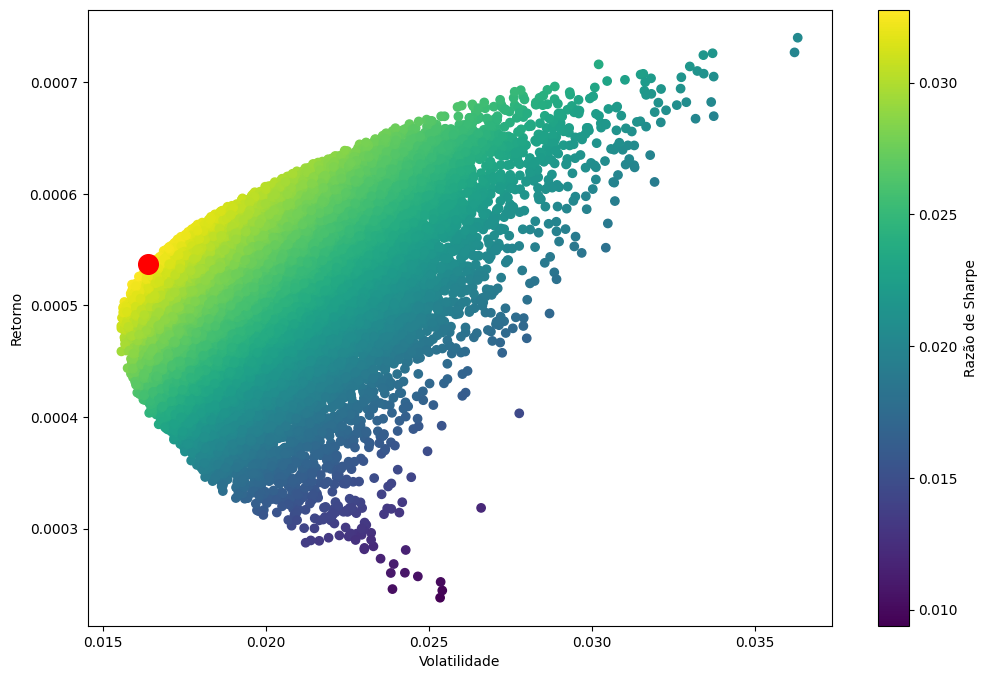

In [12]:
max_sr_ret = ret_arr[max_sharpe_idx]
max_sr_vol = vol_arr[max_sharpe_idx]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Razão de Sharpe')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200) # black dot
plt.show()

Vamos ver como se comporta em comparação com a fronteira de eficiência:

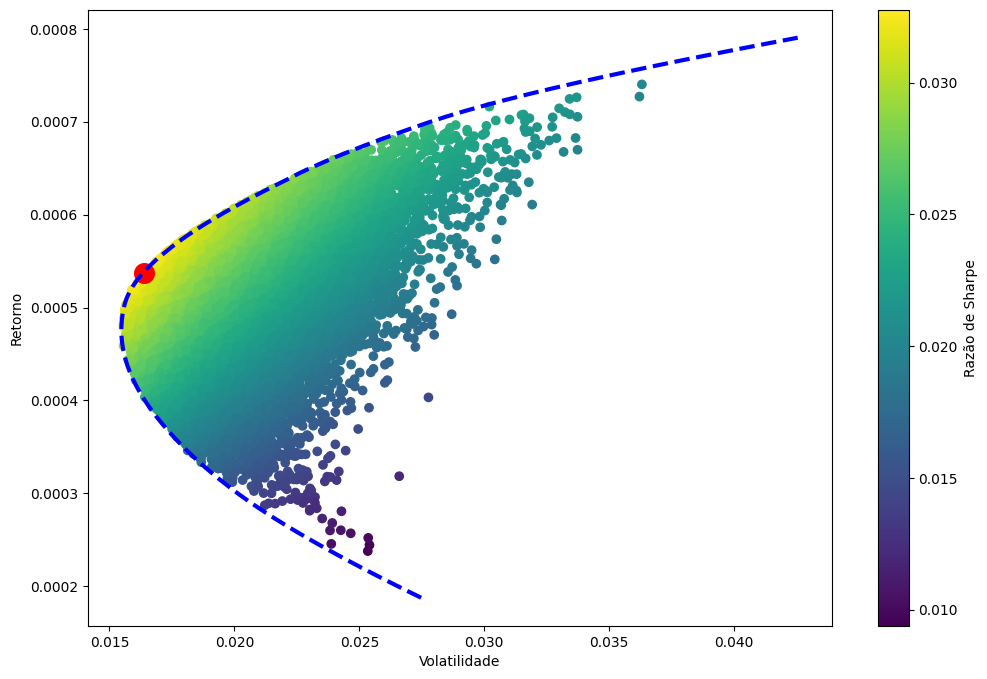

In [13]:
from scipy import optimize

POINTS_IN_FRONTIER = 100

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

frontier_x = []
min_ret, max_ret = ret_arr.min(), ret_arr.max()
ret_unit = (max_ret-min_ret)/10

frontier_y = np.linspace(min_ret-ret_unit, max_ret+ret_unit, POINTS_IN_FRONTIER)

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

plt.figure(figsize=(12,8))

plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Razão de Sharpe')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'b--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200) # black dot
plt.show()

## Carteira com índice the Sharpe ótimo

Com esses dados, podemos também calcular a carteira com o índice de Sharpe ótimo:

In [14]:
def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
best_portfolio = pd.DataFrame(dict(acao=portfolio_assets, peso=op_results.x))
fig = px.pie(best_portfolio, values='peso', names='acao', title='Distribuição ideal de carteira (2015-2025)')
fig.show()

Interessante notar que, na nossa simulação, a melhor carteira teve um valor minúsculo de RAIL3. A carteira ótima de fato some com esse ativo. (Mesmo que não sumisse, só a questão prática de manter uma posição tão minúscula já justificaria abandoná-lo.)

Um ponto notável é como MGLU3 foi reduzido: o fato de ter tido uma alta e uma baixa enormes deve ter prejudicado sua posição. ITUB3 tomou a maior parte da carteira, mesmo tendo uma queda considerável. Foi sorte, porque a queda não deveria influenciar (não indicou nenhuma pertda em valores) e, além disso, os ganhos da ação foram consideráveis. O ideal seria ajustar os valores (adicionando talvez valores proporcionais de XTBR11 ao retorno de ITUB3, ou removendo de casos antigos), e nesse caso é interessante pensar que ITUB3 dominaria ainda mais a carteira.

# Retorno do patrimônio

Com esses valores, vamos ver como nosso patrimônio se comportaria.

In [15]:
SEED_CAPITAL = 35000
removed_assets = ['^BVSP', 'BOVA11.SA']


best_portfolio2 = best_portfolio.pivot_table(columns='acao', values='peso', aggfunc='first').reset_index(drop=1).reset_index(drop=1)
initial_allocation = best_portfolio2[portfolio_assets].iloc[0] * SEED_CAPITAL
initial_values = assets_df[portfolio_assets].loc[0]
rated_df = assets_df[portfolio_assets] / initial_values * initial_allocation

returns_df = pd.concat([
    assets_df.drop(columns=portfolio_assets+removed_assets),
    rated_df
], axis=1)
returns_df['Total'] = rated_df[portfolio_assets].sum(axis=1)

figura = px.line(title = 'Retorno de carteira ótima de acordo com índice de Sharpe')
for i in portfolio_assets:
    figura.add_scatter(x = returns_df["Date"], y = returns_df[i], name = i)
figura.update_traces(line=dict(width=0.5))
figura.add_scatter(x = returns_df["Date"], y = returns_df['Total'], name = 'Total')
figura.show()

In [16]:
initial_value = returns_df['Total'].iloc[0]
final_value = returns_df['Total'].iloc[-1]
profit = final_value - initial_value
rate = profit/initial_value
print(f'''
Valor final: {final_value:.2f}
Ganho total: {profit:.2f}
Rendimento:  {rate*100:.1f}%
''')


Valor final: 136283.88
Ganho total: 101283.88
Rendimento:  289.4%



Quase quadruplicamos o patrimônio! Nada mau! (Mas confesso que seria ainda mais legal aproveitar aquele pico insando da MGLU3.)

## Value at Risk

Vamos agora estimar o Value at Risk (VaR) da carteira. Vamos calculá-lo para os últimos 30 dias do investimento (afinal, não faz muito sentido calcular para 10 anos ou, pior ainda, para 30 dias dez anos atrás).


In [17]:
def var(returns, confidence_level):
  returns = np.array(returns)
  z_score = norm.ppf(confidence_level)
  stdev = np.std(returns)
  var = -(returns.mean() + z_score * stdev)
  return var

dataset = returns_df.copy() # Not that we get rates, we can use the index, because rates are comparable and dimensionless
dataset.drop(labels = ['Date']+portfolio_assets, axis=1, inplace=True)
portfolio_rates = np.log(dataset / dataset.shift(1)) # Daily returns as requestes, not monthly
dataset_date = returns_df.copy()
date = dataset_date.filter(["Date"]) 
portfolio_return_rates = pd.concat([date, portfolio_rates], axis=1)
portfolio_return_rates= portfolio_return_rates[portfolio_return_rates['Total'].notna()]

return_rates_30 = portfolio_return_rates['Total'].tail(30)
returns_30 = returns_df['Total'].tail(30)

var_df = pd.DataFrame(
    {'Confianca': [.95, .99], 
     'VaR retorno': [var(return_rates_30, 0.95), var(return_rates_30, 0.99)],
     'VaR monetário': [var(returns_30, 0.95), var(returns_30, 0.99)]
    })

var_df

Confianca  VaR retorno  VaR monetário
0       0.95    -0.027295 -137076.892880
1       0.99    -0.037862 -139127.526375

Aqui eu devo confessar minha ignorância. Como assim posso perder mais que o valor total da carteira? Dessa questão, infelizmente, não terei a nota.